## EasyVisa Project
***Marks: 60***

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

In [1]:
#!pip install xgboost

## Importing necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

# Removes the limit for the number of displayed columns
pd.set_option('display.max_columns', None)
# Sets the limit for the number of displayed rows
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

visa = pd.read_csv('/content/drive/MyDrive/Great Learning/Ensemble Techniques/Project 5/EasyVisa.csv')

Mounted at /content/drive


In [4]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [5]:
# return the first 5 rows
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
# return the last 5 rows
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset

In [7]:
# return the number of rows and columns
data.shape

(25480, 12)

#### Observations
* The data set has 25,480 rows and 12 columns.

### Check the data types of the columns for the dataset

In [8]:
# return a summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


####Observations
* There are 9 columns of data type object (string), 2 columns of data type integer, and 1 column of data type float.

In [9]:
# check for duplicate values
data.duplicated().sum()

0

####Observations
* There are no duplicate values in the data set.

## Exploratory Data Analysis

####**Leading Questions**
1. Does education leavel impact visa certification status?
2. Do different regions have different education requirements?
3. Does region affect certification status?
4. Does applicant continent affect certification status?
5. Does work experience impact certification status?
6. Do employees with work experience require job training? 
7. Does certification status change with the prevailing wage?
8. How does prevailing wage vary across regions?
9. Do wage units impact certification status?

#### Let's check the statistical summary of the data

In [10]:
# describe the statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


####Observations
* The average number of employees is 5,667, and the median is 2,109.
* The minimum number is -26. This is not a valid data entry. We will address this.
* The earliest year of establishment is 1800 while the newest is 2016.
* The average prevailing wage is $74,456. 
 
* The minimum prevailing wage is $2.14. 

#### Fixing the negative values in number of employees columns

In [11]:
# check for negative values in the employee column
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

####Observations
* 33 rows and 12 columns have negative values less than 0.

In [12]:
# take the absolute values for employees column 
data['no_of_employees'] = abs(data['no_of_employees'])

# recheck the data set
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


####Observations 
* The negative values have been replaced by absolute values. 
* The minimum number of employees is 11. 

In [13]:
data.describe(include=['object']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


####Observations
* Most of the employees are from Asia. 
* Most employees have a Bachelor's degree. 
* Most employees desire full-time employment. 
* Most applicants do not require further job training. 
* Of the five regions, the Northeast is the most popular immigrant destination. 


#### Let's check the count of each unique category in each of the categorical variables

In [14]:
# create list of categorical variables
cat_var = list(data.select_dtypes('object').columns)

# function to print the count of each unique value per column
for column in cat_var:
    print(data[column].value_counts())
    print('-' * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

####Observations
* There are 25,480 unique case IDs, one for every row in the data set. There are no duplicate case IDs. 
* The majority of applicants are from Asia with 16,861 applicants. 
* There is a fairly similar number of applicants holding both Bachelor's and Master's degrees.
* More applicants have job experience than not. 
* The vast majority of applicants do not require job training. 
* The Northeast and South are the most popular regions for employment among immigrants. 
* The majority of applicants are seeking full time work. 


In [15]:
# check unique values
data['case_id'].nunique()

25480

####Observations
* There are 25,480 unique values. 

In [16]:
# drop case_id column to clean up the data set
#data.drop(['case_id'], axis=1, inplace=True)

# check to ensure the column has been dropped
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Univariate Analysis

In [17]:
# define function to combine a boxplot and histogram into one figure
def histogram_boxplot(data, feature, figsize = (12, 8), kde = False, bins = None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # (2) number of rows of the subplot grid
        sharex = True,  # share x axis among all subplots
        gridspec_kw = {'height_ratios': (0.25, 0.75)},
        figsize = figsize,) 
    
    # draw boxplot with mean
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color= 'pink')
    
    # draw histrogram
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2)
    ax_hist2.axvline(
        data[feature].mean(), color = 'yellow', linestyle='--')  # show mean on histogram
    ax_hist2.axvline(
        data[feature].median(), color = 'purple', linestyle='-')  # show median on histogram

#### Observations on number of employees

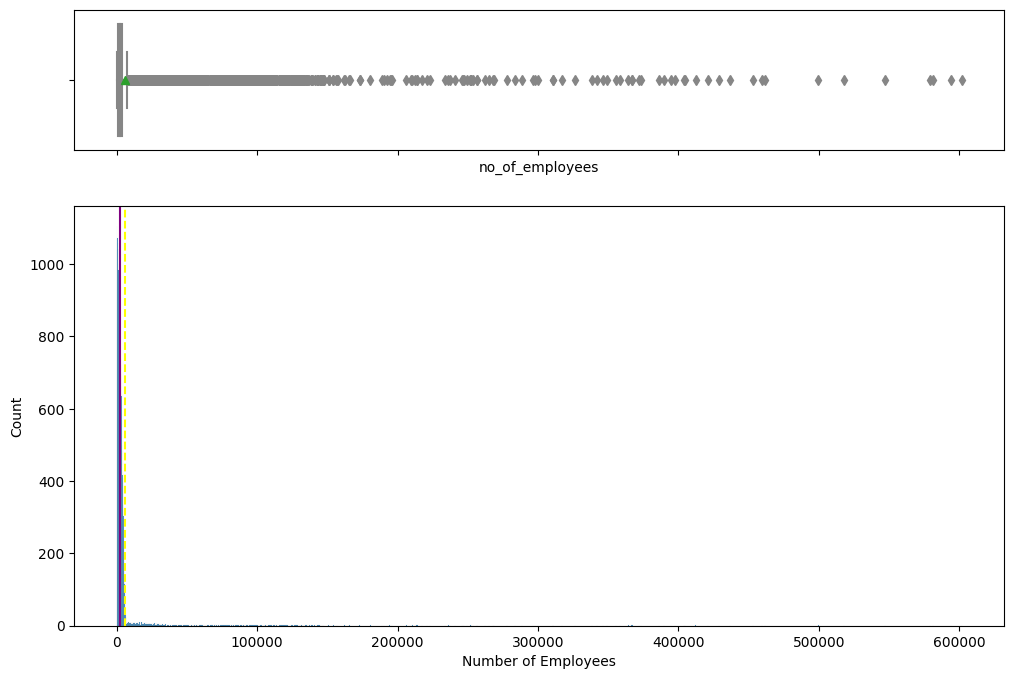

In [18]:
# draw combined histogram and boxplot
histogram_boxplot(data, 'no_of_employees')

# label x axis
plt.xlabel('Number of Employees');

####Observations
* Number of employes has a right-skewed distribution with outliers on one side.

#### Observations on prevailing wage

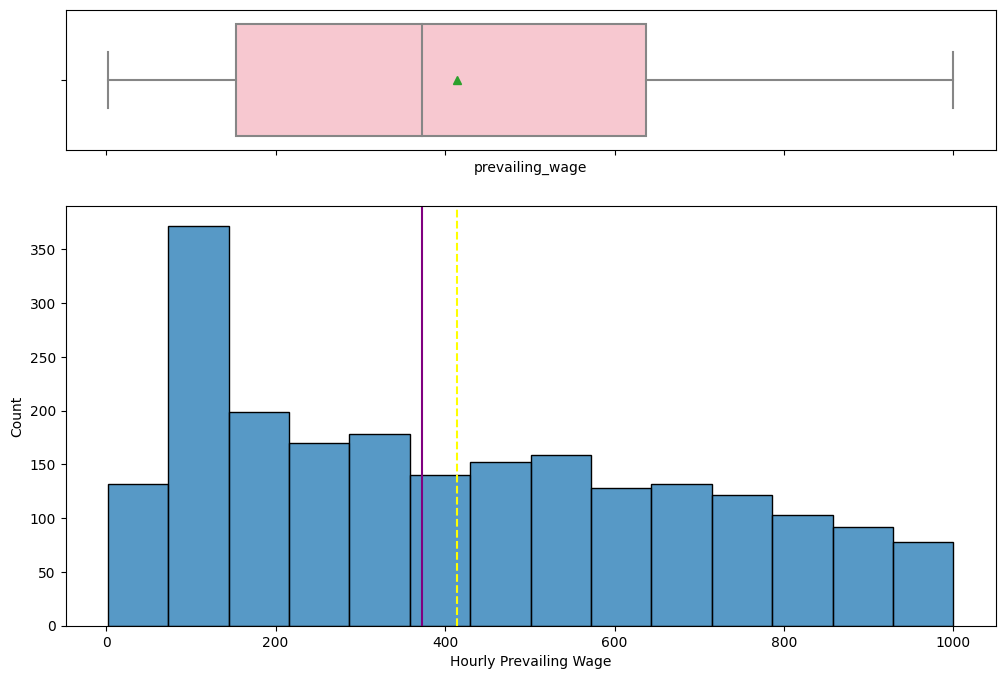

In [19]:
# draw combined histogram and boxplot where unit_of_wage is hourly
histogram_boxplot(data[data['unit_of_wage']=='Hour'], 'prevailing_wage')

# label x axis
plt.xlabel('Hourly Prevailing Wage');

####Observations
* Prevailing wage has a right-skewed distribution with outliers to one side. 
* There is a spike in prevailing wages less than 100.

In [20]:
# check observations with a prevailing wage less than 100
data.loc[data['prevailing_wage'] < 100]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,EZYV339,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,EZYV635,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,EZYV840,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,EZYV877,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,EZYV996,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25023,EZYV25024,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,EZYV25259,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,EZYV25309,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,EZYV25330,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [21]:
# count of entries divided by wage unit type less than 100
data.loc[data['prevailing_wage'] < 100, 'unit_of_wage'].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

####Observations
* There are 176 hourly value less than 100. 

In [22]:
# define function to create labeled barplot
def labeled_barplot(data, feature, perc = False, n = None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 2, 6))
    else:
        plt.figure(figsize = (n + 2, 6))

    # rotate x labels 45 degrees and set font size
    plt.xticks(rotation = 45, fontsize = 15)
    ax = sns.countplot(data = data, x = feature, palette = 'Paired', order = data[feature].value_counts().index[:n],)

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(100 * p.get_height() / total)  # percentage of each class of category
        else:
            label = p.get_height()  # count of each level of category

        x = p.get_x() + p.get_width() / 2  # plot width
        y = p.get_height()  # plot height

        ax.annotate(
            label,
            (x, y), ha = 'center', va = 'center', size = 12, xytext = (0, 5), textcoords = 'offset points',)  # annotate percentage

    plt.show()

#### Observations on continent

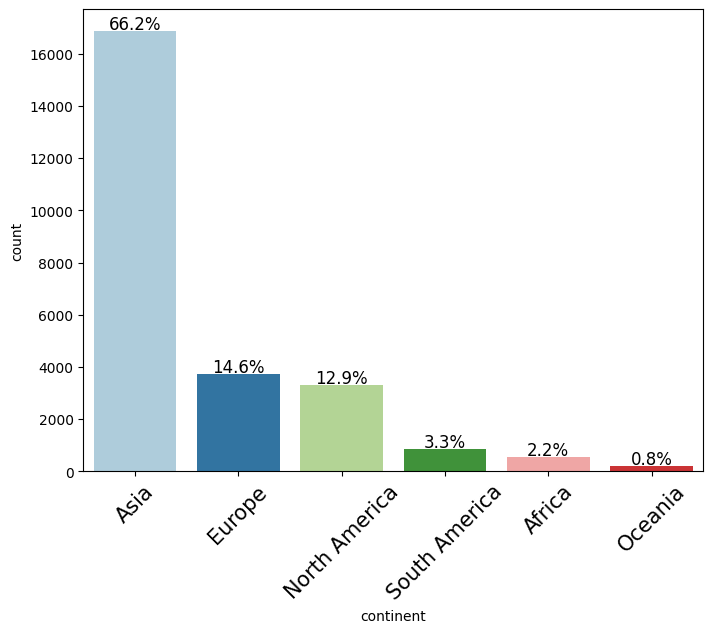

In [23]:
# draw labeled barplot
labeled_barplot(data, 'continent', perc=True) 

####Observations 
* 66.2% of applicants are from Asia. 
* Only 0.8% of applicants are from Oceania.

#### Observations on education of employee

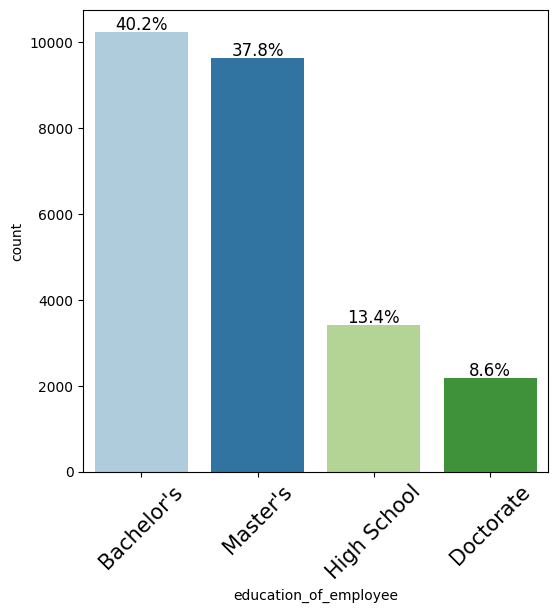

In [24]:
# draw labeled barplot
labeled_barplot(data, 'education_of_employee', perc=True) 

####Observations
* The majority of applicants hold a Bachelor's or Master's degree at 40.2% and 37.8% respectively. 

#### Observations on job experience

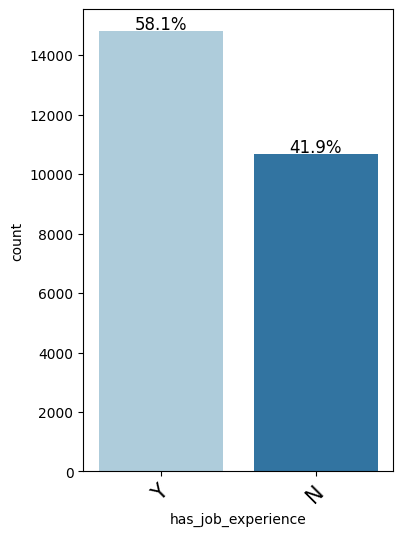

In [25]:
# draw labeled barplot
labeled_barplot(data, 'has_job_experience', perc=True) 

####Observations
* 58.1% of applicants have job experience.

#### Observations on job training

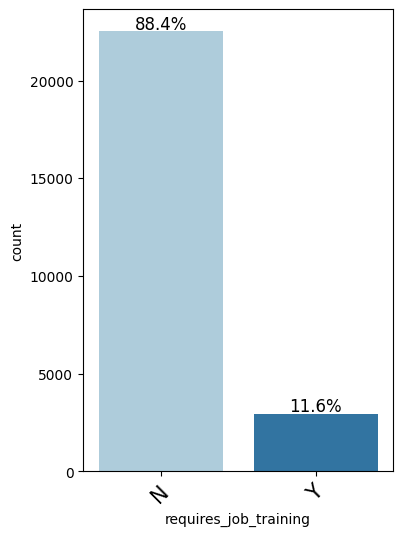

In [26]:
# draw labeled barplot
labeled_barplot(data, 'requires_job_training', perc=True) 

####Observations
* 88.4% of applicants do not require job training.

#### Observations on region of employment

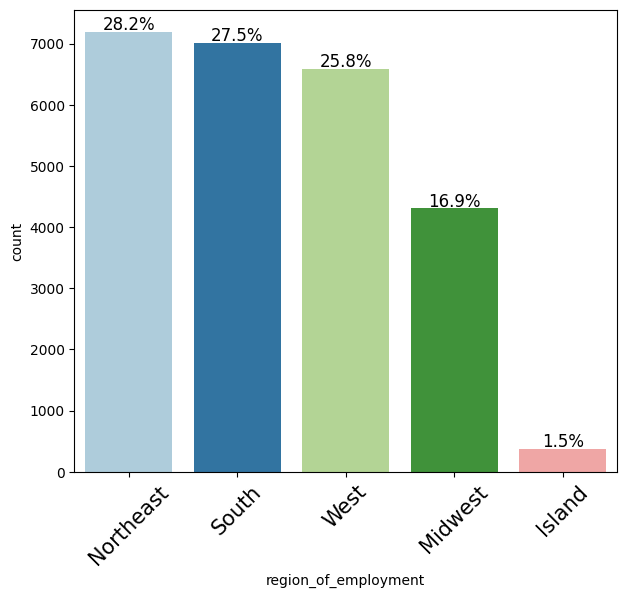

In [27]:
# draw labeled barplot
labeled_barplot(data, 'region_of_employment', perc=True) 

####Observations
* The Northeast, South, and West are the most popular destination among immigrants seeking work. They are fairly even at 28.2%, 27.5%, and 25.8% respectively.

#### Observations on unit of wage

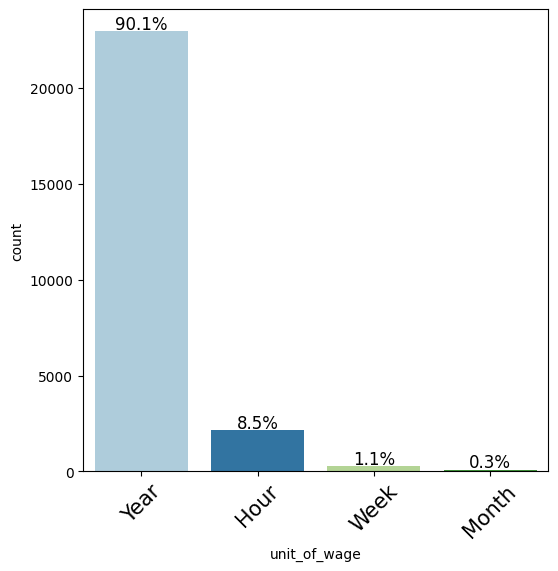

In [28]:
# draw labeled barplot
labeled_barplot(data, 'unit_of_wage', perc=True) 

####Observations
* The most popular unit for prevailing wage is yearly salary. This is not surprising as it is an easy unit to measure. 

#### Observations on case status

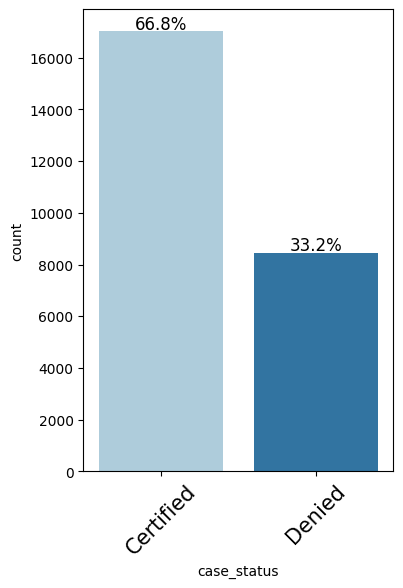

In [29]:
# draw labeled barplot
labeled_barplot(data, 'case_status', perc=True) 

####Observations
* 66.8% of visas are approved or certified while 33.2% were denied. 

### Bivariate Analysis

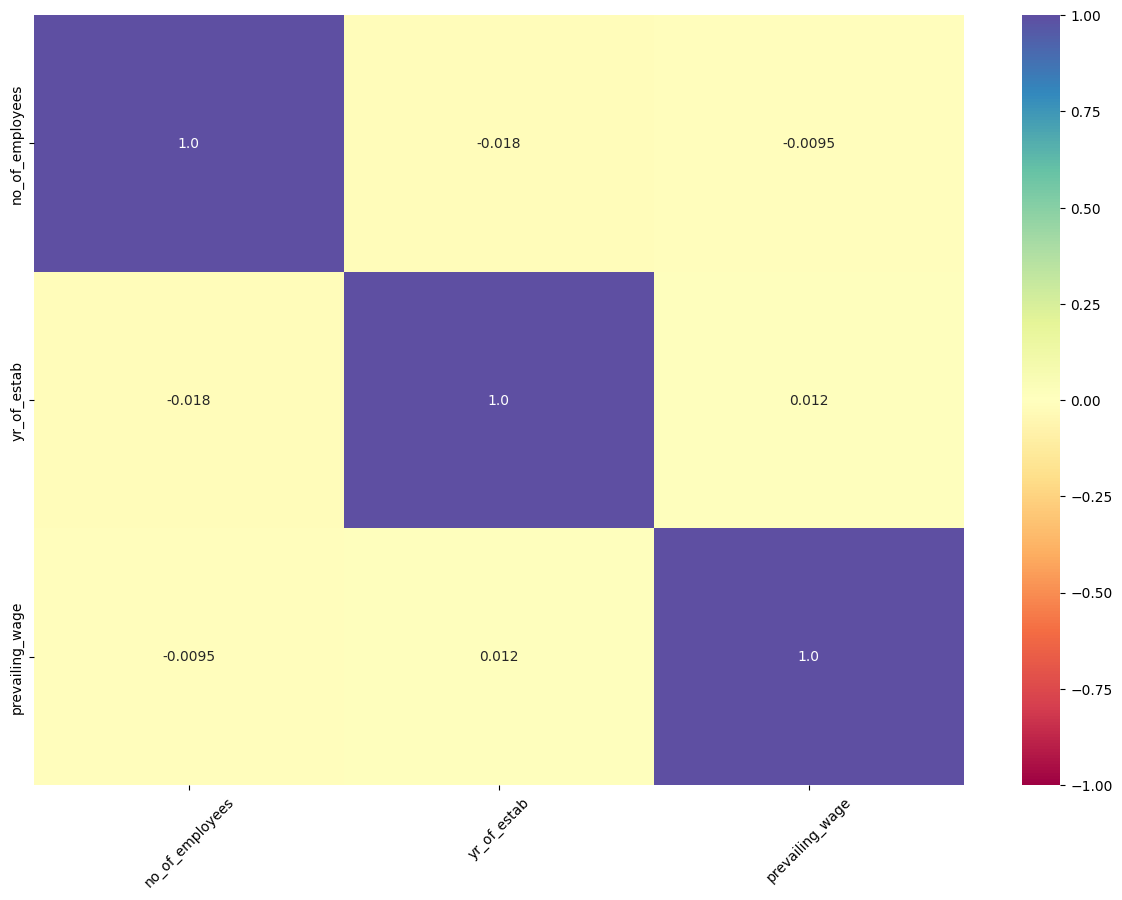

In [30]:
# draw correlation heatmap of numerical columns
cols = data.select_dtypes(include=np.number).columns.tolist()

# set figure size
plt.figure(figsize=(15, 10))

# draw heatmap
sns.heatmap(data[cols].corr(), annot=True, vmin=-1, vmax=1, fmt='.2', cmap='Spectral');

# rotate x labels 45 degrees and set font size to 10
plt.xticks(rotation = 45, fontsize = 10);

####Observations
* There are no strong correlations in the data set. 

**Creating functions that will help us with further analysis.**

In [31]:
# create function to plot distributions with respect to target
# used to identify potential patterns and relationships 
def wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize = (12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title('Distribution of Target for Target = ' + str(target_uniq[0]))
    
    # draw histplot
    sns.histplot(data = data[data[target] == target_uniq[0]],
        x = predictor, kde = True, ax = axs[0, 0], color = 'teal', stat = 'density',)

    axs[0, 1].set_title('Distribution of Target for Target =' + str(target_uniq[1]))
    
    # draw histplot
    sns.histplot(data = data[data[target] == target_uniq[1]],
        x = predictor, kde = True, ax = axs[0, 1], color = 'orange', stat = 'density',)

    axs[1, 0].set_title('Boxplot W.R.T Target')
    
    # draw boxplot
    sns.boxplot(data = data, x = target, y = predictor, ax = axs[1, 0], palette = 'gist_rainbow')

    axs[1, 1].set_title('Boxplot (without outliers) W.R.T Target')
   
   # draw boxplot
    sns.boxplot(data = data, x = target, y = predictor, ax = axs[1, 1], showfliers = False, palette = 'gist_rainbow',)

    plt.tight_layout()
    plt.show()

In [32]:
# create function to draw stacked barplots
# good for showing how the composition of a group changes across categories
def stacked_barplot(data, predictor, target):
   
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(by = sorter, ascending = False)
    print(tab1)
    print('-' * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = 'index').sort_values(by = sorter, ascending = False)
    tab.plot(kind='bar', stacked=True, figsize=(count + 5, 5))
    
    # show legend
    plt.legend(loc = 'lower left', frameon = False,)
    plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
    
    plt.show()

#### Does education leavel impact certification status?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


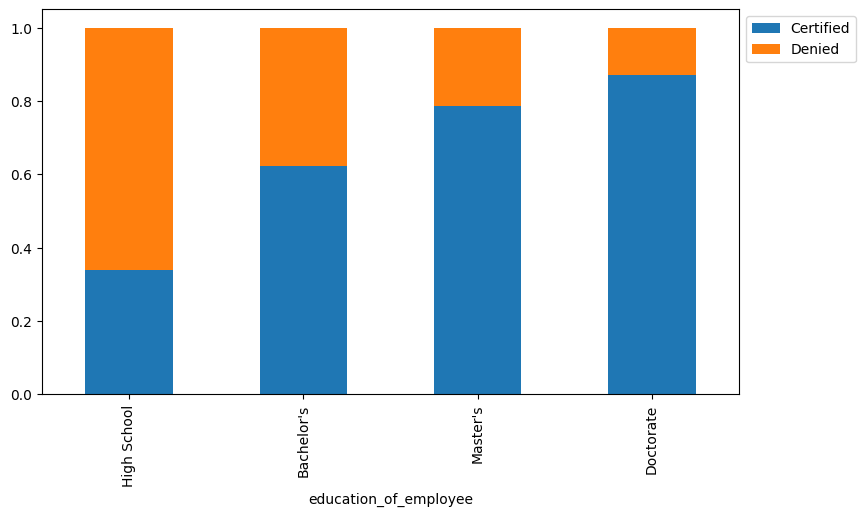

In [33]:
# draw stacked barplot
stacked_barplot(data, 'education_of_employee', 'case_status')

In [34]:
# print percentage of denied applications
print(str((8462 / 25480) * 100) + '% of all applications were denied.')
print(str((3867 / 10234) * 100) + "% of all applications where applicants hold a Bachelor's degree were denied.")
print(str((2256 / 3420) * 100) + "% of all applications where applicants hold a High School diploma were denied.")
print(str((2059 / 9634) * 100) + "% of all applications where applicants hold a Master's degree were denied.")
print(str((280 / 2192) * 100) + "% of all applications where applicants hold a Doctorate degree were denied.")

33.210361067503925% of all applications were denied.
37.785811999218296% of all applications where applicants hold a Bachelor's degree were denied.
65.96491228070175% of all applications where applicants hold a High School diploma were denied.
21.372223375544944% of all applications where applicants hold a Master's degree were denied.
12.773722627737227% of all applications where applicants hold a Doctorate degree were denied.


####Observations
* Overall there are more certified applications than denied applications, with only 33.2% of applications being denied. 
* There are less denied applications proportionately among higher education categories: Bachelor's, Master's, and Doctorate. 
* There are more denied application among the High School category. 
* Approximately 66% of applications where applicants hold a high school diploma are denied.

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

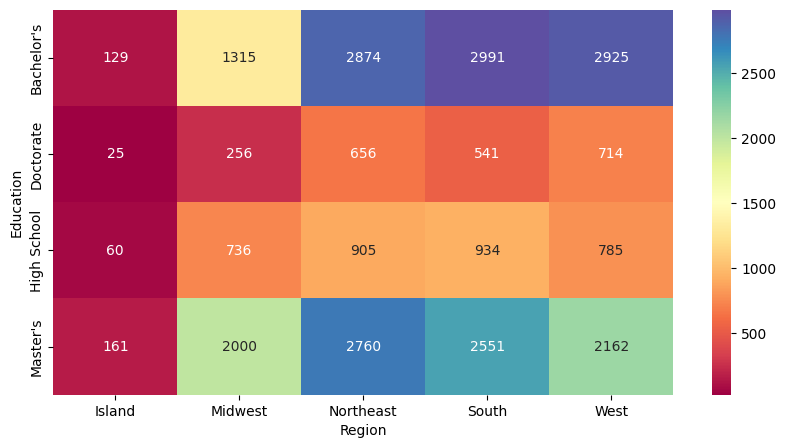

In [35]:
# draw correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'], data['region_of_employment']),
    annot=True, fmt='g', cmap='Spectral')

# set labels
plt.ylabel('Education')
plt.xlabel('Region');


####Observations
* There is a strong negative correlation between the Midwest region and Doctorate degrees. There is a slight positive correlation between the Midwest and Master's degrees.
* There is are negative correlations between Island and all degrees. This isn't surprising as only 1.5% of applicants desire this region. 
* There are strong positive correlations between both Bachelor's and Master's degrees and the Northeast.
* There are positive correlations between Bachelor's and Master's degrees and the South. 
* There are positive correlations between Bachelor's and Master's degrees and the West. 

#### Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


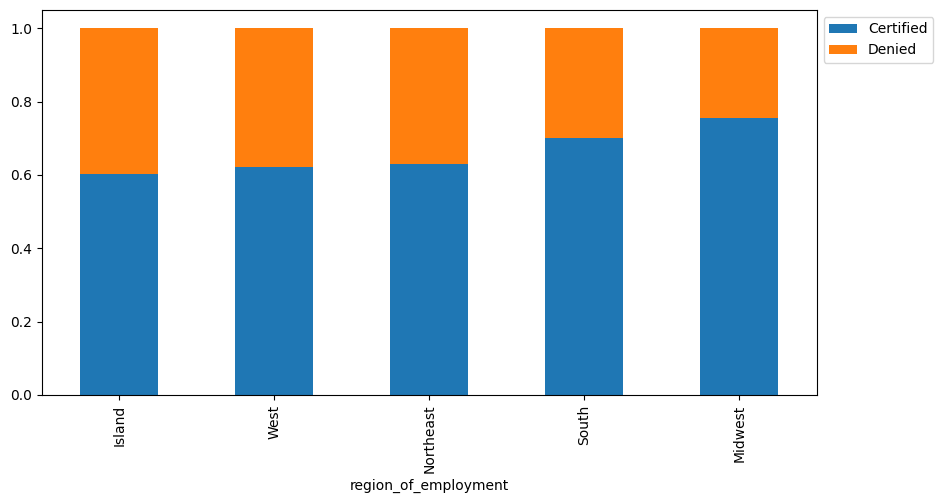

In [36]:
# draw stacked barplot
stacked_barplot(data, 'region_of_employment', 'case_status')

In [37]:
# print percentage of certified applications per region
print(str((17018 / 25480) * 100) + '% of all applications certified.')
print(str((4526 / 7195) * 100) + "% of certified applications in the Northeast.")
print(str((4100 / 6586) * 100) + "% of certified applications in the West.")
print(str((4913 / 7017) * 100) + "% of certified applications in the South.")
print(str((3253 / 4307) * 100) + "% of certified applications in the Midwest.")
print(str((226 / 375) * 100) + "% of certified applications in the Island region.")

66.78963893249608% of all applications certified.
62.90479499652536% of certified applications in the Northeast.
62.25326450045551% of certified applications in the West.
70.01567621490665% of certified applications in the South.
75.52820989087532% of certified applications in the Midwest.
60.266666666666666% of certified applications in the Island region.


####Observations
* 66.8% of all spplications are certified. 
* This hold true and constant across the majority of regions with percentages ranging from approximately 62% to 75% certified. 
* Region is unlikely to affect the chance of application certification.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


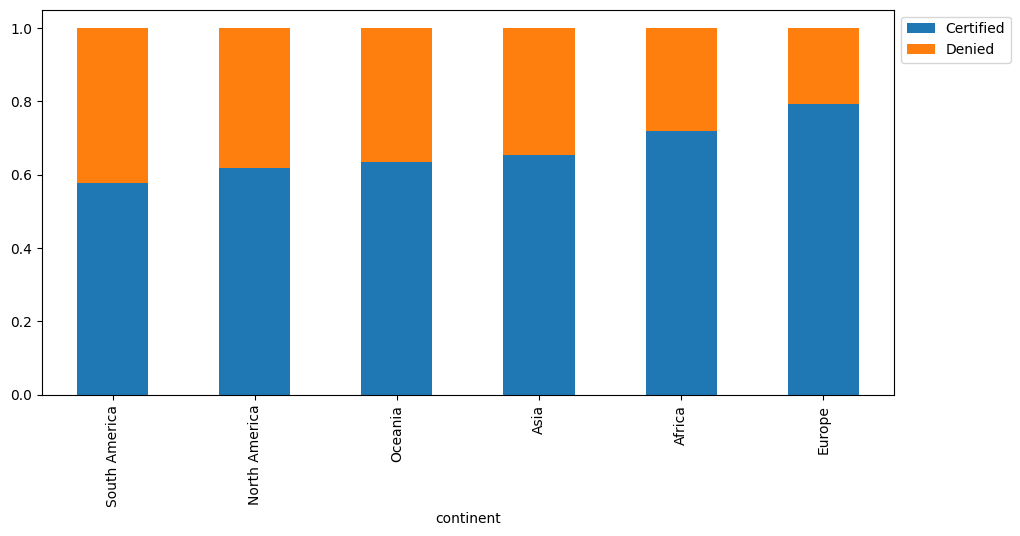

In [38]:
# draw stacked barplot
stacked_barplot(data, 'continent', 'case_status')

In [39]:
# print percentage of certfied applications per continent
print(str((17018 / 25480) * 100) + '% of all applications certified.')
print(str((11012 / 16861) * 100) + "% of certified applications in Asia.")
print(str((2037 / 3292) * 100) + "% of certified applications in North America.")
print(str((2957 / 3732) * 100) + "% of certified applications in Europe.")
print(str((493 / 852) * 100) + "% of certified applications in South America.")
print(str((397 / 551) * 100) + "% of certified applications in Africa.")
print(str((122 / 192) * 100) + "% of certified applications in Oceania.")

66.78963893249608% of all applications certified.
65.31047980546823% of certified applications in Asia.
61.87727825030377% of certified applications in North America.
79.23365487674168% of certified applications in Europe.
57.863849765258216% of certified applications in South America.
72.0508166969147% of certified applications in Africa.
63.541666666666664% of certified applications in Oceania.


####Observations
* Percentages of certified applications range between 58% to 79% showing a slight bariable difference depedning on continent. 
* Continent is unlikely to affect certification status in a meaningful way. 

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


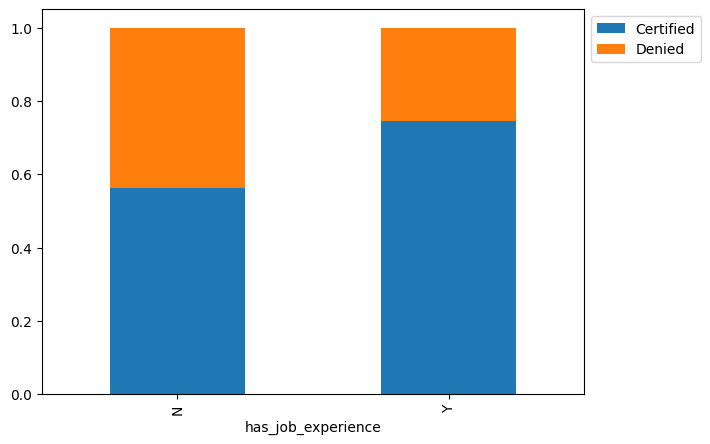

In [40]:
# draw stacked barplot
stacked_barplot(data, 'has_job_experience', 'case_status')

In [41]:
# print percentage of certfied applications per experience Y/N
print(str((5994 / 10678) * 100) + '% of certified applications where applicant does not have previous job experience.')
print(str((11024 / 14802) * 100) + "% of certified applications where applicant has previous job experience.")

56.1341075107698% of certified applications where applicant does not have previous job experience.
74.47642210512093% of certified applications where applicant has previous job experience.


####Observations
* 56% of applicants with no prior job experiences recieve certification. 
* 74.5% of applicants with preveious job experience recieve certification.
* There is only a slight preference towards job experience and positive certification status.

#### Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


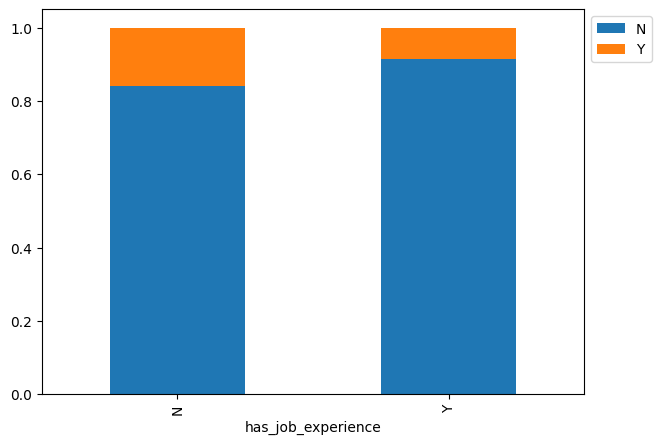

In [42]:
# draw stacked barplot
stacked_barplot(data, 'has_job_experience', 'requires_job_training')

####PObservations
* Employees with and without prior job experience largely do not require job training. This could be self-reported sample bias to appear more employable. 

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

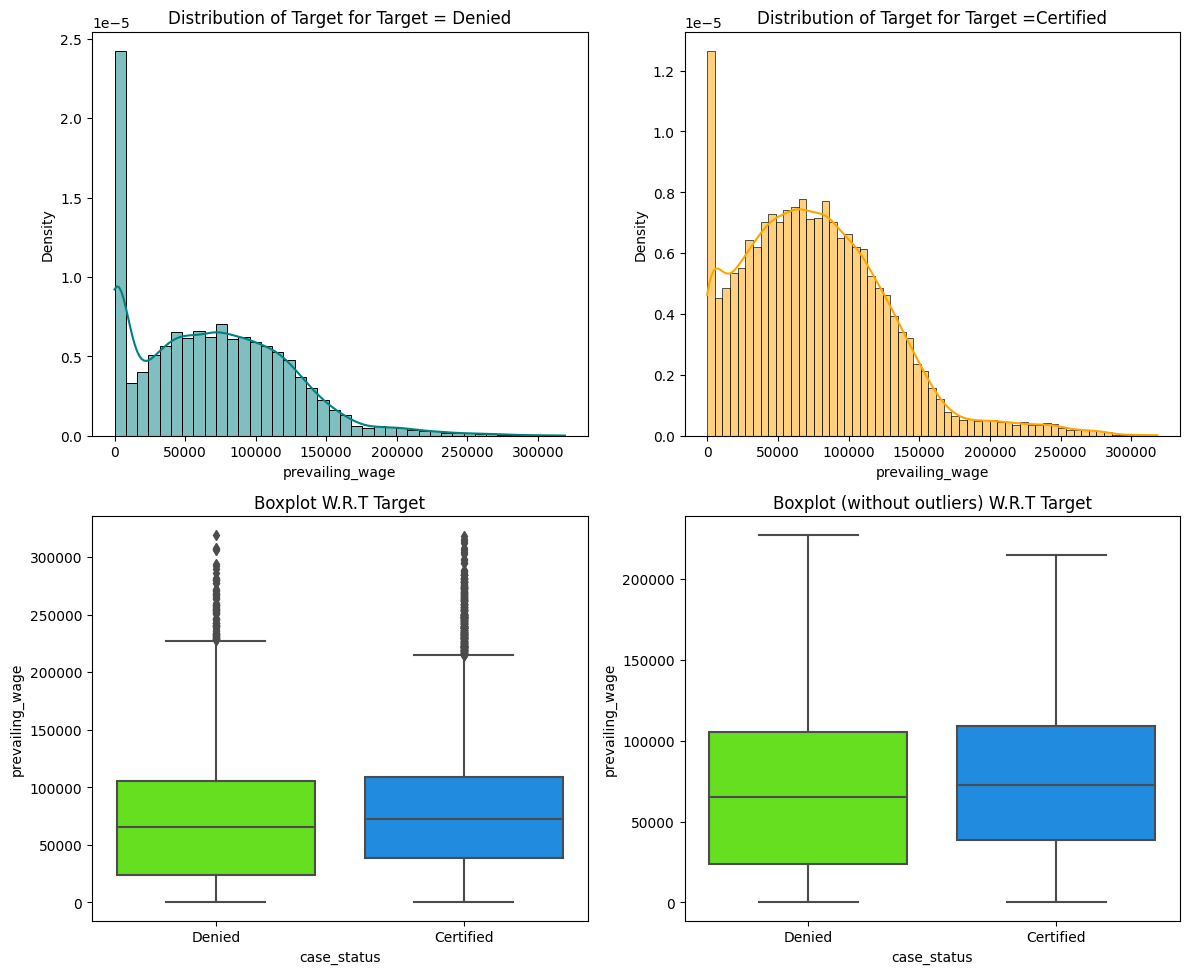

In [43]:
# draw with repsect to target plots
wrt_target(data, 'prevailing_wage', 'case_status')

####Observations
* There are outliers in both distributions. 
* The median prevailing wage is slightly higher for certified applications. However, the distributions between denied and certified applications against prevailing wage are similar. 

#### Checking if the prevailing wage is similar across all the regions of the US

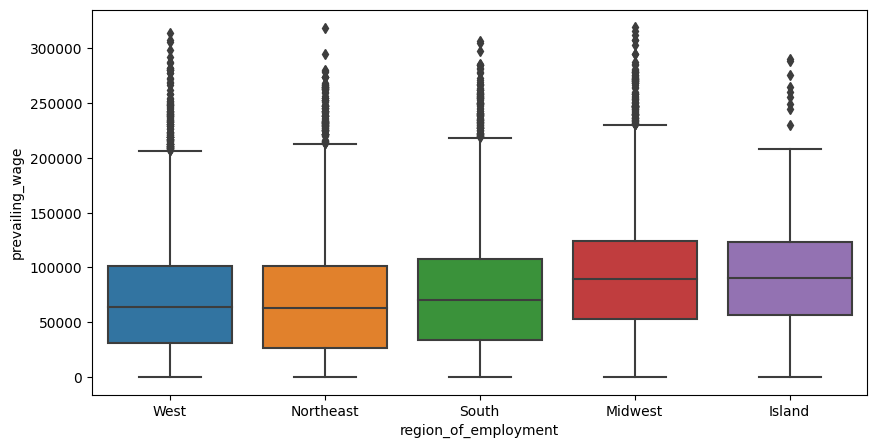

In [44]:
# draw boxpots of prevailing wage and region
plt.figure(figsize=(10, 5))
sns.boxplot(x='region_of_employment', y='prevailing_wage', data=data);

####Observations
* Prevailing wage is predominantly similar across regions. It is slightly higher for the Midwest and Island regions.

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


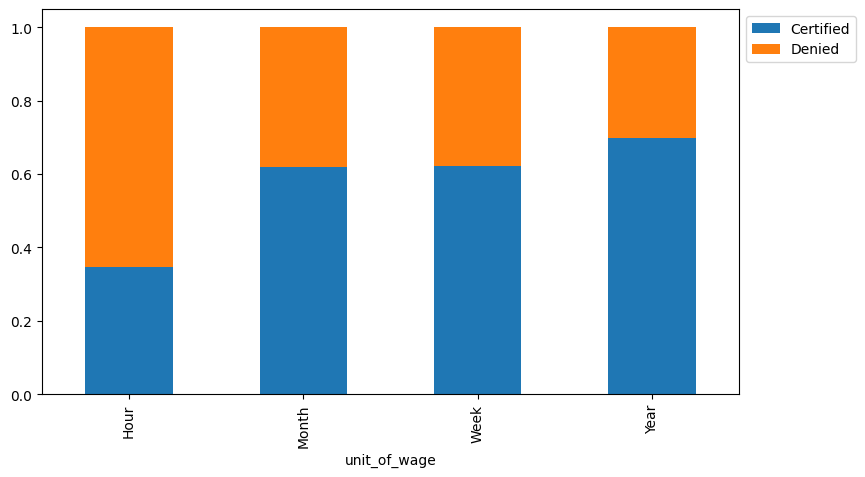

In [45]:
# draw stacked barplot
stacked_barplot(data, 'unit_of_wage', 'case_status')

In [46]:
# print percentage of denied applications with hourly wage units
print(str((1410 / 2157) * 100) + '% of denied applications where prevailing wage used hourly units.')

65.36856745479834% of denied applications where prevailing wage used hourly units.


####Observations
* Hourly wage units have a higher denial chance than other units at 65%.

## Data Preprocessing

###Remove Case_Id Column

### Outlier Check

- Let's check for outliers in the data.

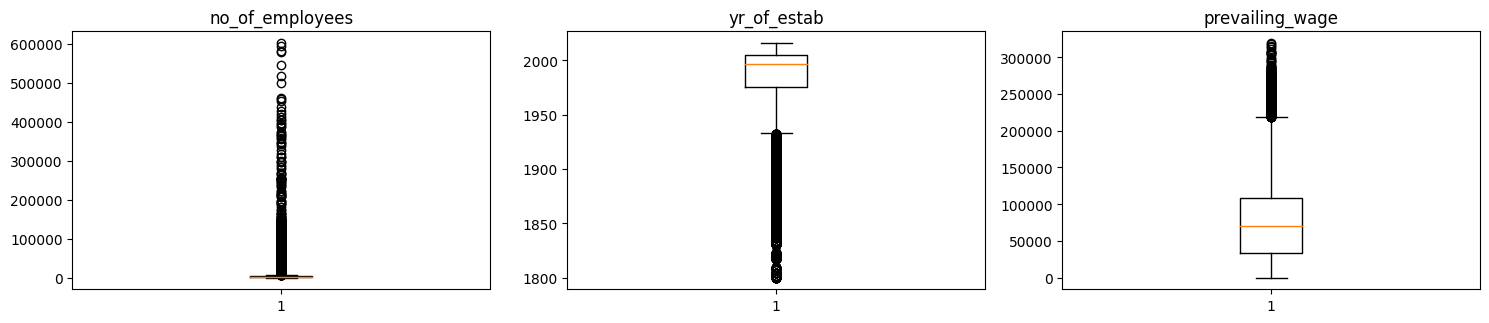

In [47]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# set figure size
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i+1)
    plt.boxplot(data[variable], whis=1.5)
    plt.title(variable)

plt.tight_layout()
plt.show()

####Observations
* There are outliers in the data set. 
* The outliers do not need treated, because they are proper values.

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [48]:
# convert case_status to binary, 1 = Certified and 0 = Denied
data['case_status'] = data['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)

# drop case_status column to create feature matrix X
X = data.drop('case_status', axis=1)

# create dummy variables for all categorical variables in X
X = pd.get_dummies(X)

# create target variable Y
Y = data["case_status"]

# split data into training and testing with 70:30 ratio, stratification based on case_status
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [49]:
# 1 = Certified and 0 = Denied
print('The shape of training set : ', X_train.shape)
print('The shape of test set : ', X_test.shape)
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))

The shape of training set :  (17836, 25508)
The shape of test set :  (7644, 25508)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


####Observations
* Around 67% of applications are certified in the training set. 
* This is preserved in the testing set where we see approximately 67% of applications are certified. 
* The model's accuracy can be improved from 67%.


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [50]:
# define a function to compute classification performance metrics
def model_performance_classification_sklearn(model, predictors, target):
    
    # generate predictions using the model
    pred = model.predict(predictors)

    # calculate the classification metrics
    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    # create a dataframe to store the performance metrics
    df_perf = pd.DataFrame(
        {'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1': f1,},
        index=[0],)

    return df_perf

In [51]:
# define a function to create a confusion matrix using sklearn and seaborn
def confusion_matrix_sklearn(model, predictors, target):

    # generate predictions using the model
    y_pred = model.predict(predictors)

    # calculate the confusion matrix
    cm = confusion_matrix(target, y_pred)

    # format the labels for the heatmap annotations
    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # create a heatmap using seaborn to visualize the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [52]:
# create a decision tree classifier object
model = DecisionTreeClassifier(random_state=1)

# fit the decision tree classifier to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

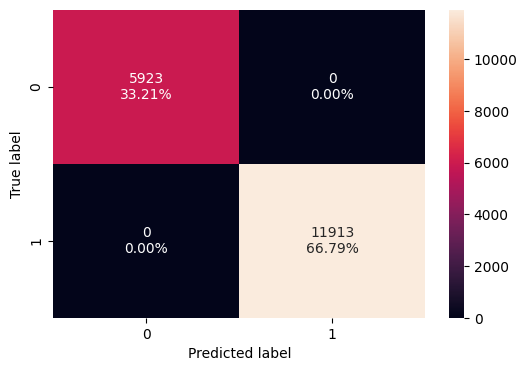

In [53]:
# draw confusion matrix of train set
confusion_matrix_sklearn(model, X_train, y_train)

In [54]:
# check performance of the train set
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


####Observations
* True positive: 33.21% the model predicted the visa application will get correctly certified.
* False negative: 0% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 0% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 66.79% the model predicted the visa application will get correctly denied.
* While it appears our model achieved perfect performance on the train data, it is rare and suggests overfitting meaning the model may not generalize new data well.  


#### Checking model performance on test set

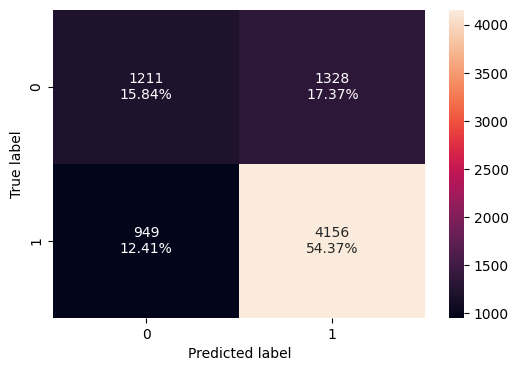

In [55]:
# draw confusion matrix of test set
confusion_matrix_sklearn(model, X_test, y_test)

####Observations
* True positive: 15.84% the model predicted the visa application will get correctly certified.
* False negative: 17.37% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 12.41% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 54.37% the model predicted the visa application will get correctly denied.

In [56]:
# check performance of the test set
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.702119,0.814104,0.757841,0.784966


# Observations
* For the train set, the results show that the model has a perfect accuracy, recall, precision, and F1-score.
* These results suggest that the model is overfitting the training data, meaning that it is memorizing the training data and may not generalize well to new data.
* The test set results show that the model has an accuracy (0.7) meaning that it correctly predicts 70% of the examples in the test set. 
* Recall, precision, and F1-score are all non-zero, indicating that the model is able to identify some true positives, but is also making false positives and false negatives. 
* These results suggest that the model is not able to generalize new data and may be overfitting the training data.

### Hyperparameter Tuning - Decision Tree

In [57]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with n_jobs = -1
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=acc_scorer, n_jobs=-1, cv=5)
grid_obj.fit(X_train, y_train)

# Output the best estimator
dtree_estimator = grid_obj.best_estimator_
print(dtree_estimator)


DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)


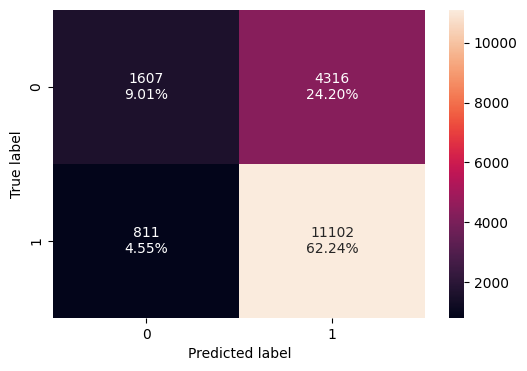

In [58]:
# draw confusion matrix of train set on tuned estimator
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

####Observations
* True positive: 9.01% the model predicted the visa application will get correctly certified.
* False negative: 24.20% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 4.55% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 62.24% the model predicted the visa application will get correctly denied.

In [59]:
# check performance of train data on tuned estimator
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


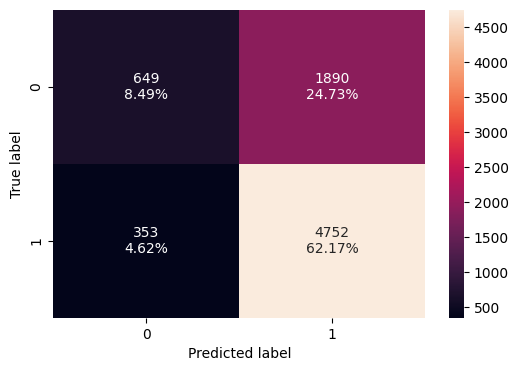

In [60]:
# draw confusion matrix of test data on tuned estimator
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

####Observations
* True positive: 8.49% the model predicted the visa application will get correctly certified.
* False negative: 24.73% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 4.62% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 62.17% the model predicted the visa application will get correctly denied.

In [61]:
# check performance of test data on tuned estimator
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


####Observations
* The results for the train and test sets are similar indicating the model is likely not overfitting. 
* The accuracy of both sets is around 71%, indicating the model correctly classified aproximately 71% of observations in both sets.
* The recall for both sets is high around 93%, indicating the model correctly identified a high proportion of positive cases for both sets. 
* The precision is similar at 72% for both sets, indicating indicating that the model is correctly predicting positive cases in both sets.
* The F1-score is similar on both sets at 81%. 
* Overall, the performance metrics for both sets are similar indicating that the model is generalizing well to new data.

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [62]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

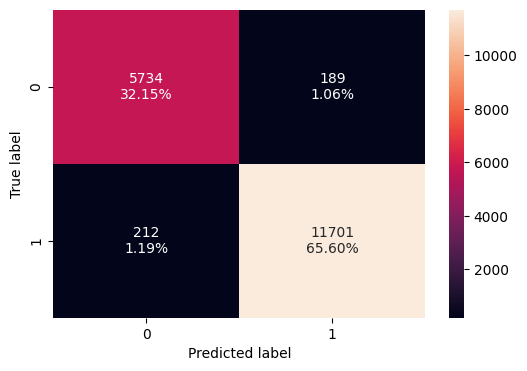

In [63]:
# draw confusion matrix of train data on bagging classifier
confusion_matrix_sklearn(bagging_classifier,X_train,y_train)

####Observations
* True positive: 32.15% the model predicted the visa application will get correctly certified.
* False negative: 1.06% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 1.19% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 65.60% the model predicted the visa application will get correctly denied.

In [64]:
# check performance of train data on bagging classifier
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.977517,0.982204,0.984104,0.983153


#### Checking model performance on test set

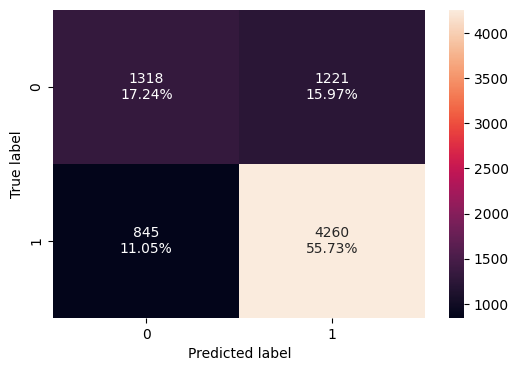

In [65]:
# draw confusion matrix of test data on bagging classifier
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

####Observations
* True positive: 17.24% the model predicted the visa application will get correctly certified.
* False negative: 15.97% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 11.05% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 55.73% the model predicted the visa application will get correctly denied.

In [66]:
# check performance of test data on bagging classifier
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.729723,0.834476,0.77723,0.804837


####Observations
* On the training set, the model achieved high accuracy (0.98), recall (0.98), precision (0.98), and F1-score (0.98). This suggests that the model was able to correctly predict a large proportion of the samples.

* The test set results show lower accuracy (0.73), recall (0.83), precision (0.78), and F1-score (0.8). This indicates that the model did not perform as well on the test set. 

* Lower precision and F1-score indicate that the model may have higher false positive rates on the test set.

* These results indicate the model is overfitting. 

### Hyperparameter Tuning - Bagging Classifier

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with cv = 5
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)


#### Checking model performance on training set

In [ ]:
# draw confusion matrix of train data on tuned bagging estimator
confusion_matrix_sklearn(bagging_estimator_tuned,X_train,y_train)

####Observations
* True positive: 32.77% the model predicted the visa application will get correctly certified.
* False negative: 0.44% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 0.03% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 66.76% the model predicted the visa application will get correctly denied.

In [ ]:
# check performance of train data on tuned bagging estimator
bagging_classifier_model_tuned_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
bagging_classifier_model_tuned_train_perf

#### Checking model performance on test set

In [ ]:
# draw confusion matrix of test data on tuned bagging estimator
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

####Observations
* True positive: 14.74% the model predicted the visa application will get correctly certified.
* False negative: 18.47% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 8.4% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 58.39% the model predicted the vias application will get correctly denied.

In [ ]:
# check performance of test data on tuned bagging estimator
bagging_classifier_model_tuned_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
bagging_classifier_model_tuned_test_perf

####Observations
* The train set indicates high accuracy (0.995), recall (0.999), precision (0.993), and F1-score (0.996). This suggests that the model performed well on the train set and was able to correctly predict a large proportion of the samples.

* The test set results show accuracy (0.73), recall (0.87), precision (0.76), and F1-score (0.81). 

* The lower precision and F1-score suggest that the model may have higher false positive rates on the test set.

* This indicates that the model is overfitting.

### Random Forest

In [ ]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1) 
rf_estimator.fit(X_train,y_train)

#### Checking model performance on training set

In [ ]:
# draw confusion matrix of train data on random forest estimator
confusion_matrix_sklearn(rf_estimator,X_train,y_train)

####Observations
* True positive: 33.21% the model predicted the visa application will get correctly certified.
* False negative: 0% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 0.01% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 66.79% the model predicted the vias application will get correctly denied.

In [ ]:
# check performance of train data on random forest estimator
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator,X_train,y_train)
rf_estimator_model_train_perf

#### Checking model performance on test set

In [ ]:
# draw confusion matrix of test data on random forest estimator
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

####Observations
* True positive: 16.54% the model predicted the visa application will get correctly certified.
* False negative: 16.68% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 11.5% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 55.29% the model predicted the vias application will get correctly denied.

In [ ]:
# check performance of test data on random forest estimator
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator,X_test,y_test)
rf_estimator_model_test_perf

####Observations 
* The train set results indicate that the model achieved high accuracy (0.9999), recall (0.9999), precision (1.0), and F1-score (0.9999). This suggests that the model performed very well on the train set and was able to correctly predict almost all of the samples.

* The test set shows lower accuracy (0.72), recall (0.83), precision (0.77), and F1-score (0.8).

* The lower precision and F1-score suggest that the model may have higher false positive rates on the test set.

* This suggests the model is overfitting.

### Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, cv=5, n_jobs=-1, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

#### Checking model performance on training set

In [ ]:
# draw confusion matrix of train data on tuned random forest estimator
confusion_matrix_sklearn(rf_tuned,X_train,y_train)

####Observations
* True positive: 16.93% the model predicted the visa application will get correctly certified.
* False negative: 16.28% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 6.45% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 60.34% the model predicted the vias application will get correctly denied.

In [ ]:
# check performance of train data on tuned random forest estimator
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train,y_train)
rf_tuned_model_train_perf

#### Checking model performance on test set

In [ ]:
# draw confusion matrix of test data on tuned random forest estimator
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

####Observations
* True positive: 15.27% the model predicted the visa application will get correctly certified.
* False negative: 17.95% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 7.88% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 58.91% the model predicted the vias application will get correctly denied.

In [ ]:
# check performance of test data on tuned random forest estimator
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned,X_test,y_test)
rf_tuned_model_test_perf

####Observations
* The training set shows accuracy (0.77), which means that the model correctly classified about 77% of the instances in the training set.
* Recall of 0.90 indicates that the model was able to correctly identify about 90% of the positive instances in the training set. 
* Precision score of 0.79 shows that when the model predicted an instance to be positive, it was correct about 79% of the time. 
* F1-score of 0.84 balances both measure of precision and recall as the harmonic mean.
* The test set shows accuracy (0.74), lower than the training set accuracy, indicating that the model may be overfitting to the training set. 
* Recall (0.88) is similar to the training set, indicating that the model was able to correctly identify about 88% of the positive instances in the test set. 
* Precision score (0.77) shows that when the model predicted an instance to be positive, it was correct about 77% of the time. 
* F1-score of 0.82 is slightly lower than the training set, indicating that the model may not generalize well to new data.
* There is a possibility the model is overfitting. 





## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#### Checking model performance on training set

In [ ]:
# draw confusion matrix of train data on AdaBoost classifier
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

####Observations
* True positive: 14.61% the model predicted the visa application will get correctly certified.
* False negative: 18.6% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 7.6% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 59.19% the model predicted the vias application will get correctly denied.

In [ ]:
# check performance of train data on AdaBoost classifier
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_train_perf

#### Checking model performance on test set

In [ ]:
# draw confusion matrix of test data on AdaBoost classifier
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

####Observations
* True positive: 14.44% the model predicted the visa application will get correctly certified.
* False negative: 18.77% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 7.8% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 58.99% the model predicted the vias application will get correctly denied.

In [ ]:
# check performance of test data on AdaBoost classifier
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test)
ab_classifier_model_test_perf

####Observations
* The results show that the model has similar performance on the training and test sets.

* Overall, these results suggest that the model is not overfitting.






### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

#### Checking model performance on training set

In [ ]:
# draw confusion matrix of train data on tuned AdaBoost classifier
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

####Observations
* True positive: 19.72% the model predicted the visa application will get correctly certified.
* False negative: 13.49% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 14.57% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 52.22% the model predicted the vias application will get correctly denied.

In [ ]:
# check performance of trained data on tuned AdaBoost classifier
abc_tuned_model_tuned_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_tuned_train_perf

#### Checking model performance on test set

In [ ]:
# draw confusion matrix of test data on tuned AdaBoost classifier
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

####Observations
* True positive: 19.47% the model predicted the visa application will get correctly certified.
* False negative: 13.75% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 14.56% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 52.22% the model predicted the vias application will get correctly denied.

In [ ]:
# check performance of test data on tuned AdaBoost classifier
abc_tuned_model_tuned_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test)
abc_tuned_model_tuned_test_perf

####Observations 
* The results show that the tuned AdaBoost classifier performed relatively well on both the train and test sets.
* There may be slight overfitting. 
* The accuracy scores are moderate, indicating that the model is predicting the correct class for around 70% of the data points in both sets. 
* Recall scores indicate that the model is identifying around 78% of the true positive cases.
* Precision scores indicate that around 79% of the predicted positive cases are actually true positive cases. 
* F1-scores, which provide a balance between precision and recall, are around 79%, suggesting that the model is performing reasonably well overall.

### Gradient Boosting Classifier

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#### Checking model performance on training set

In [ ]:
# draw confusion matrix of train data on gradient classifier
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

####Observations
* True positive: 16.76% the model predicted the visa application will get correctly certified.
* False negative: 16.44% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 7.77% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 59.02% the model predicted the vias application will get correctly denied.

In [ ]:
# check performance of train data on gradient classifier
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gb_classifier_model_train_perf

#### Checking model performance on test set

In [ ]:
# draw confusion matrix of test data on gradient classifier
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

####Observations
* True positive: 15.92% the model predicted the visa application will get correctly certified.
* False negative: 17.29% the model predicted the visa application will not get certified but in reality, the visa application should get certified.
* False positive: 8.12% the model predicted the visa application will get certified, but in reallity, the vias application should get denied.
* True negative: 58.66% the model predicted the visa application will get correctly denied.

In [ ]:
# check performance of test data on gradient classifier
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test) ## Complete the code to check performance for test data
gb_classifier_model_test_perf

####Observations
* The model has accuracy 75.78% on the train set and an accuracy of 74.58% on the test set. 
* Recall for the train set is 88.37% which means that 88.37% of the positive instances were correctly classified. 
* Precision for the train set is 78.21% which means that 78.21% of the instances predicted as positive were actually positive. 
* F1-score for the train set is 82.97%.
* For the test set, the recall is 87.84% which means that 87.84% of the positive instances were correctly classified. 
* Precision for the test set is 77.23% which means that 77.23% of the instances predicted as positive were actually positive. 
* F1-score for the test set is 82.19%.
* The results show that the model is performing reasonably well. The performance on the train and test sets is relatively similar, which suggests that the model is not overfitting to the train data.

### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

#### Checking model performance on training set

In [ ]:
# draw confusion matrix of train data on tuned gradient classifier
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [ ]:
# check performance of train data on tuned gradient classifier
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
gbc_tuned_model_train_perf

#### Checking model performance on test set

In [ ]:
# draw confusion matrix of test data on tuned gradient classifier
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [ ]:
# check performance of test data on tuned gradient classifier
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
gbc_tuned_model_test_perf

### Note - You can choose **not to build** XGBoost if you have any installation issues

### XGBoost Classifier

In [ ]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#### Checking model performance on training set

In [ ]:
# draw confusion matrix of train data on XGBoost classifier
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [ ]:
# check performance of train data on XGBoost classifier
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
xgb_classifier_model_train_perf

#### Checking model performance on test set

In [ ]:
# draw confusion matrix of test data on XGBoost classifier
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [ ]:
# check performance of test data on XGBoost classifier
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_classifier_model_test_perf

### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

#### Checking model performance on training set

In [ ]:
# draw confusion matrix of train data on tuned XGBoost classifier
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [ ]:
# check performance of train data on tuned XGBoost classifier
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
xgb_tuned_model_train_perf

#### Checking model performance on test set

In [ ]:
# draw confusion matrix of test data on tuned XGBoost classifier
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [ ]:
# check performance of test data on tuned XGBoost classifier
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
xgb_tuned_model_test_perf

## Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

### Checking model performance on training set

In [ ]:
# draw confusion matrix of train data on stacking classifier
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [ ]:
# check performance of train data on stacking classifier
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
stacking_classifier_model_train_perf

### Checking model performance on test set

In [ ]:
# draw confusion matrix of test data on stacking classifier
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [ ]:
# check performance of test data on stacking classifier
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
stacking_classifier_model_test_perf

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
     dtree_estimator_model_train_perf.T,
     bagging_classifier_model_train_perf.T,
     bagging_classifier_model_tuned_train_perf.T,
     rf_estimator_model_train_perf.T,
     rf_tuned_model_train_perf.T,
     ab_classifier_model_train_perf.T,
     abc_tuned_model_tuned_train_perf.T,
     gb_classifier_model_train_perf.T,
     gbc_tuned_model_train_perf.T,
     xgb_classifier_model_train_perf.T,
     xgb_tuned_model_train_perf.T,
     stacking_classifier_model_train_perf.T,
     ],
     axis=1,
    )
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
     dtree_estimator_model_test_perf.T,
     bagging_classifier_model_test_perf.T,
     bagging_classifier_model_tuned_test_perf.T,
     rf_estimator_model_test_perf.T,
     rf_tuned_model_test_perf.T,
     ab_classifier_model_test_perf.T,
     abc_tuned_model_tuned_test_perf.T,
     gb_classifier_model_test_perf.T,
     gbc_tuned_model_test_perf.T,
     xgb_classifier_model_test_perf.T,
     xgb_tuned_model_test_perf.T,
     stacking_classifier_model_test_perf.T,
     ],
     axis=1,
    )
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

### Important features of the final model

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Business Insights and Recommendations

- 


___

In [ ]:
# code to convert Jupyter notebook in Google Colab to html format for submission
%%shell
jupyter nbconvert --to html ///content/EasyVisa_Kimberly_Magerl.ipynb